### Collect Data

https://archive.ics.uci.edu/ml/datasets/Online+Retail

In [2]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx --quiet

### Load Data

Check dataset details

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

In [16]:
data_df = pd.read_excel("Online Retail.xlsx")

In [18]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [19]:
data_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Remove missing values from the dataset

In [22]:
data_df=data_df.dropna()

In [23]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


### Explore & Visualize Dataset

Number of Unique customers

In [25]:
len(data_df.CustomerID.unique())

4372

Geograhic information

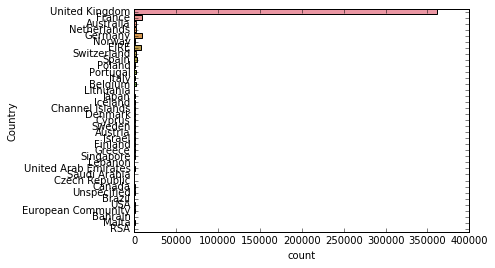

In [28]:
sns.countplot(y='Country', data=data_df)

Remove Non-UK records as enough Geographic details about other countries/region is not available.

In [29]:
data_df = data_df[data_df.Country.isin(['United Kingdom'])]

Number of Unique Products

In [30]:
len(data_df.StockCode.unique())

3661

Invoice Date Range

In [32]:
max(data_df.InvoiceDate) - min(data_df.InvoiceDate)

Timedelta('373 days 04:23:00')

### Remove Invoices for 'Returns'

Number of Returned invoices

In [34]:
len(data_df.InvoiceNo.str.startswith('C'))

361878

In [39]:
df = data_df[data_df.InvoiceNo.str.startswith('C').fillna(False)]

In [40]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


Remove these invoices from the dataset

In [41]:
data_df = data_df[~data_df.InvoiceNo.str.startswith('C').fillna(False)]

In [42]:
data_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Build a Customer Dataset

In [44]:
cust_df = pd.DataFrame(data_df.CustomerID.unique(), columns=['CustomerID'])

In [45]:
cust_df.head()

,CustomerID
0,17850.0
1,13047.0
2,13748.0
3,15100.0
4,15291.0


### Recency of Purchase

In [48]:
data_df['Recency'] = (pd.datetime(2011,12,10) - pd.to_datetime(data_df['InvoiceDate'])).dt.days

In [47]:
(pd.datetime(2011,12,10) - pd.to_datetime(data_df['InvoiceDate'])).dt.days

0         373
1         373
2         373
3         373
4         373
5         373
6         373
7         373
8         373
9         373
10        373
11        373
12        373
13        373
14        373
15        373
16        373
17        373
18        373
19        373
20        373
21        373
22        373
23        373
24        373
25        373
46        373
47        373
48        373
49        373
         ... 
541864      0
541865      0
541866      0
541867      0
541868      0
541869      0
541870      0
541871      0
541872      0
541873      0
541874      0
541875      0
541876      0
541877      0
541878      0
541879      0
541880      0
541881      0
541882      0
541883      0
541884      0
541885      0
541886      0
541887      0
541888      0
541889      0
541890      0
541891      0
541892      0
541893      0
Name: InvoiceDate, Length: 354345, dtype: int64

In [49]:
data_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373


In [51]:
recency_df = data_df.groupby('CustomerID', as_index=False).agg({'Recency':'min'})

In [52]:
recency_df.shape

(3921, 2)

In [53]:
cust_df = cust_df.merge(recency_df, left_on='CustomerID', right_on='CustomerID')

In [54]:
cust_df.shape

(3921, 2)

In [55]:
cust_df

,CustomerID,Recency
0,17850.0,372
1,13047.0,31
2,13748.0,95
3,15100.0,333
4,15291.0,25
5,14688.0,7
6,17809.0,16
7,15311.0,0
8,16098.0,87
9,18074.0,373


### Frequency of Invoices

In [ ]:
cust_df = cust_df.merge(frequency_df, left_on='CustomerID', right_on='CustomerID')

In [ ]:
cust_df.shape

In [ ]:
cust_df

### Monetary Value of Purchases

Calculate total purchase price for each invoice

In [ ]:
cust_df = cust_df.merge(monetary_df, left_on='CustomerID', right_on='CustomerID')

In [ ]:
cust_df

Plot the data

### Standardize the data

### Applying K-Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=2, #Number of clusters
            n_init=10, #How many times KMeans will be run with random centoid starts
            max_iter=300) #Maximum iterations

In [ ]:
km.fit()

Add cluster information to Dataframe

In [ ]:
cust_df['k_2'] = km.predict()

### Exploring 2 Clusters

Centroids

Visualize Clusters

Sum of Squared Error (SSE)

What does 2 Clusters tell us about the dataset

### How many Clusters to use?

Visualize K vs SSE

In [ ]:
sns.lineplot(x='K', y='SSE', data=sse_df)

Visualize clusters with K=5